<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/CNN_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Neural Network on the MNIST dataset**

# About Dataset
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .

we will be building our own Neural Network! We will be training it on the MNIST handwritten digit dataset. The goal is to build a NN that will be able to take in an image as input and output which digit it thinks it is (0-9).

Here is a picture of what the MNIST dataset looks like: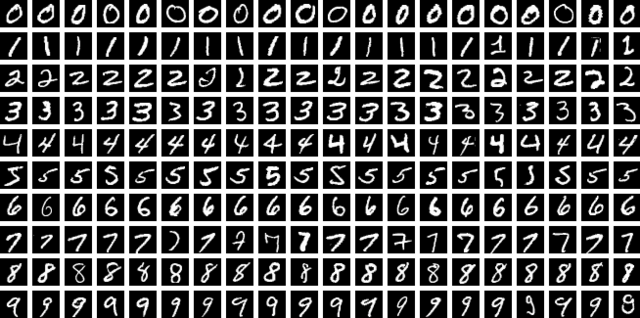

**Importing Libraries**

In [ ]:
pip install keras_tuner

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight #this tool is the "Equalizer" for biased datasets.

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, callbacks
from sklearn.utils import class_weight

# keras_tuner :- to find the best hyperparameter values for your models

from PIL import Image, ImageOps

#PIL (Python Imaging Library, now known as Pillow) are your "Image Surgeons."
#While TensorFlow handles the math, Pillow handles the actual picture files.

# Image : class used to open, manipulate, and save images.
# ImageOps : This is a collection of "ready-made" image operations.
          #  In MNIST projects, its most important job is Inverting Colors
          #  ImageOps.invert() flips the colors so the model understands the image.



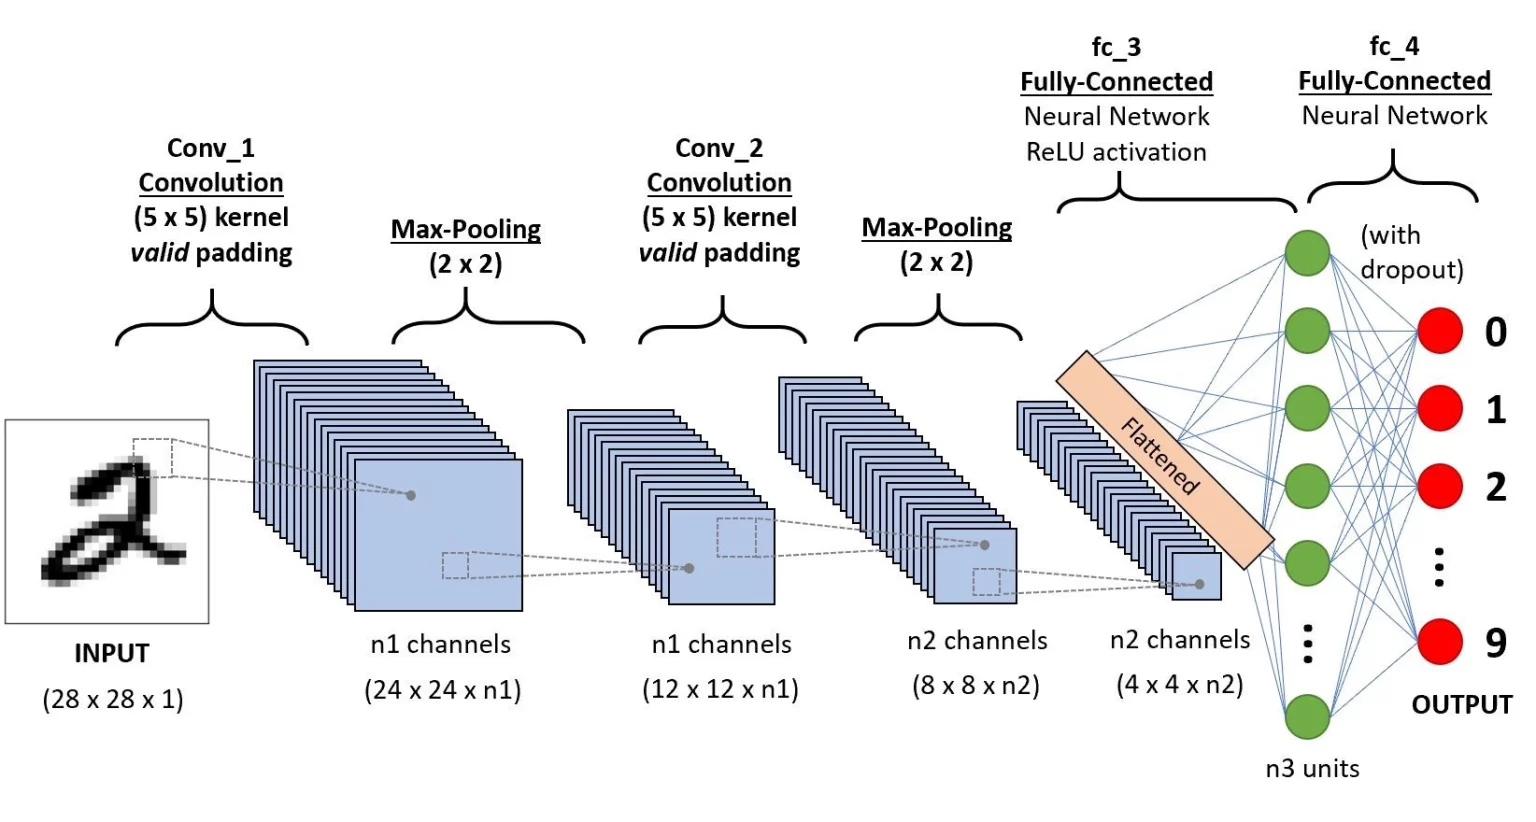

In [ ]:
#load the training data
(train_images,train_labels),(test_images,test_labels)= tf.keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_labels[45]

np.uint8(9)

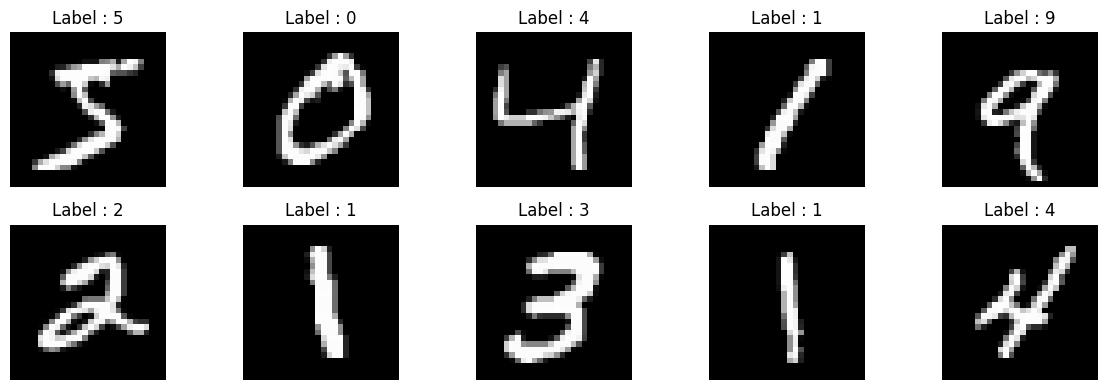

In [ ]:
plt.figure(figsize = (12,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = train_images[i].reshape(28,28)
  plt.imshow(img, cmap ='gray')
  plt.title(f'Label : {train_labels[i]}')
  plt.axis('off')
plt.tight_layout()
#plt.tight_layout() detects the overlaps and automatically adjusts the padding and margins so everything fits perfectly within the figure area.

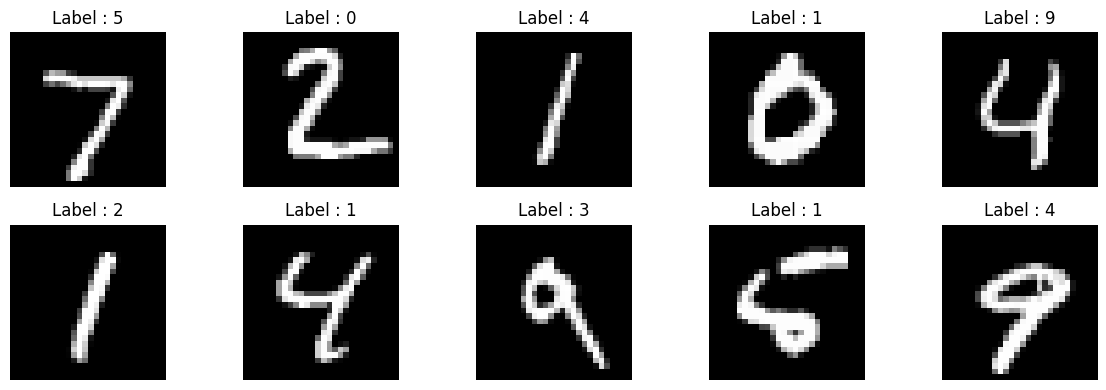

In [ ]:
plt.figure(figsize = (12,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = test_images[i].reshape(28,28)
  plt.imshow(img, cmap ='gray')
  plt.title(f'Label : {train_labels[i]}')
  plt.axis('off')
plt.tight_layout()

In [ ]:
#nomalize the pixel values
# Scale pixel values to [0, 1] range for improved gradient stability and faster convergence
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_images[45]

#reshape the image to include channel information
train_images = train_images.reshape((-1,28,28,1))
test_images =  test_images.reshape((-1,28,28,1))
""" I don't care how many images there are (Batch Size (-1)),
 just make sure each one is of 2D grid(28x28) with 1 color channel."""

train_images.shape

#one hot encode the label
train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)


In [ ]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels_categorical.shape}")

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)


In [ ]:
unique, counts = np.unique(train_labels, return_counts = True)
for digit, count in zip(unique,counts):
  print(f'Digit {digit} : {count} Samples')


Digit 0 : 5923 Samples
Digit 1 : 6742 Samples
Digit 2 : 5958 Samples
Digit 3 : 6131 Samples
Digit 4 : 5842 Samples
Digit 5 : 5421 Samples
Digit 6 : 5918 Samples
Digit 7 : 6265 Samples
Digit 8 : 5851 Samples
Digit 9 : 5949 Samples


In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
for digit, count in zip(unique, counts):
  print(f"Digit {digit}: {count} samples")

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


Our Data Is Balanced

In [ ]:
# Data Augmentation (Creating Synthetic Variations)

data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.15),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1)
    ], name = 'data_augmentation')

In TensorFlow/Keras, the 'name' argument is like giving your layer a **unique ID**.

When you eventually run **model.summary()**, Keras lists every layer. Without names, they appear as sequential_1, sequential_2, etc. By naming it 'data_augmentation', your summary becomes instantly readable. You’ll know exactly which part of the architecture handles the image transformations.

# **# Constructing the CNN model architecture**

In [ ]:
def create_model():
  #first Convulation Block
  model = models.Sequential([
    layers.Input(shape= (28,28,1)),
    data_augmentation,
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #second Convolution Block
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #ANN Dense layer
    layers.Flatten(),
    layers.Dense(256,activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(128, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(10, activation= 'softmax')
  ], name= 'MNIST_CNN')
  return model




In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 904,554 (3.45 MB)

 Trainable params: 903,402 (3.45 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# learning rate schedule - lr decay
# Gradually reduce the learning rate to fine-tune weights and avoid overshooting the minimum
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.001,
    decay_steps= 1000,
    decay_rate= 0.9
)

In [ ]:
optimizer= tf.keras.optimizers.Adam(learning_rate= lr_schedule)

In [ ]:
model.compile(
    optimizer = optimizer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [ ]:
# callback mechanism

# early_stoping
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 1,  # <--- to see the "Early Stopping" message
    restore_best_weights= True,
    mode= 'auto'
)
# model checkpoint
model_checkpoint= callbacks.ModelCheckpoint(
      'best_mnist_model.keras',
      monitor= 'val_accuracy',
      mode='max',
      save_best_only= True,
      verbose = 1  # <---  to see "Saving model
)

In [ ]:
# Create the list of callbacks
my_callbacks = [early_stopping, model_checkpoint]

# Start training with your new "safety team"
history= model.fit(
    train_images,
    train_labels_categorical,
    epochs = 30,
    batch_size= 128,
    validation_split=0.1,  # Taken 10% from the end of your training data to test on each epochs
    callbacks= my_callbacks
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5388 - loss: 1.5449
Epoch 1: val_accuracy improved from -inf to 0.13883, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.5393 - loss: 1.5434 - val_accuracy: 0.1388 - val_loss: 4.5912
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8943 - loss: 0.3437
Epoch 2: val_accuracy improved from 0.13883 to 0.97800, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8944 - loss: 0.3436 - val_accuracy: 0.9780 - val_loss: 0.0699
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9301 - loss: 0.2342
Epoch 3: val_accuracy did not improve from 0.97800
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9301 - loss: 0.2342 - val_accuracy: 0.9778 - val_loss: 0.0689
Epoch 4/30
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9458 - loss: 0.1816
Epoch 4: val_accuracy improved from 0.97800 to 0.98300, s

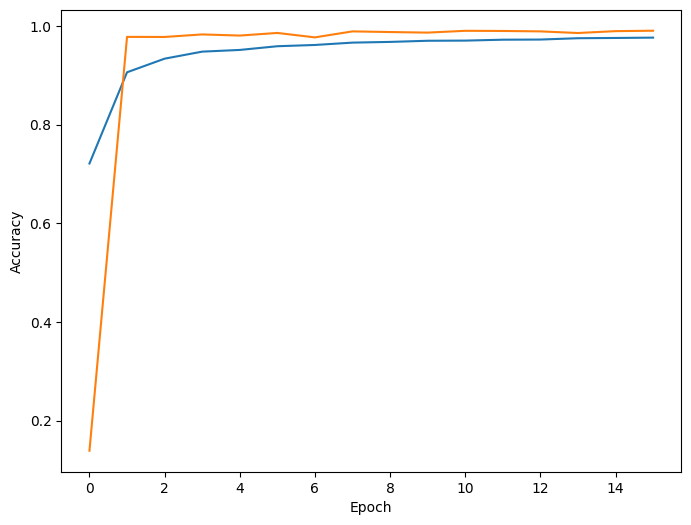

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Loss vs Validation Loss**

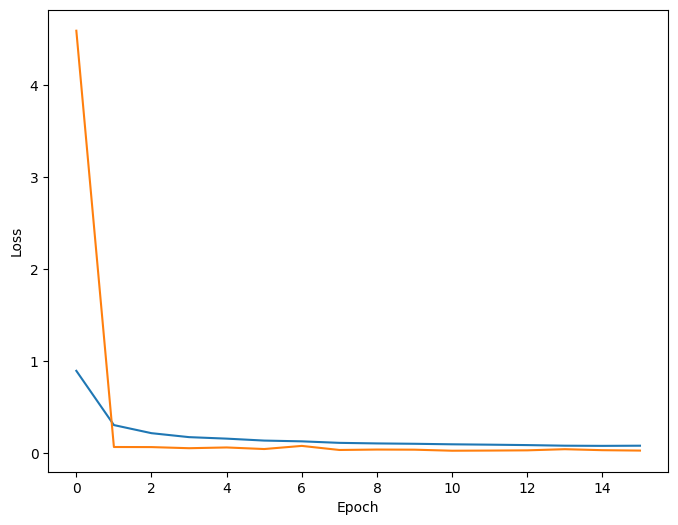

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
#load my saved model
model = tf.keras.models.load_model("/content/best_mnist_model.keras")

In [ ]:
#how did it perform?
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0398
test_loss : 0.03
test_acc : 0.99


In [ ]:
#get prediction
predictions = model.predict(test_images)
predicted_class = np.argmax(predictions, axis=1)
true_classes = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(classification_report(true_classes, predicted_class))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



There we go! 99% accuracy and a 0.03 loss. That looks exactly right.

But this might get overfit easily. So, let's tweek some parameter to make it more reliable.


In [ ]:
def create_new_model():
  #first Convulation Block
  model_1 = models.Sequential([
    layers.Input(shape= (28,28,1)),
    data_augmentation,
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.15),

    #second Convolution Block
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #ANN Dense layer
    layers.GlobalAveragePooling2D(),
    layers.Dense(256,activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(128, activation= 'leaky_relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(10, activation= 'softmax')
  ], name= 'MNIST_CNN')
  return model_1




Here I gradually increased the dropout value(0.15-0.50), changed the activation funcion from relu to leaky relu and replace the flatten layer with GAP(GlobalAveragePooling2D)

In [ ]:
model_1 = create_new_model()

In [ ]:
model_1.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 118,122 (461.41 KB)

 Trainable params: 116,970 (456.91 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# learning rate schedule - lr decay
# Gradually reduce the learning rate to fine-tune weights and avoid overshooting the minimum
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.001,
    decay_steps= 1000,
    decay_rate= 0.9
)

In [ ]:
optimizer= tf.keras.optimizers.Adam(learning_rate= lr_schedule)

In [ ]:
model_1.compile(
    optimizer = optimizer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [ ]:
# callback mechanism

# early_stoping
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 1,  # <--- to see the "Early Stopping" message
    restore_best_weights= True,
    mode= 'auto'
)
# model checkpoint
model_checkpoint= callbacks.ModelCheckpoint(
      'best_mnist_model_1.keras',
      monitor= 'val_accuracy',
      mode='max',
      save_best_only= True,
      verbose = 1  # <---  to see "Saving model
)

In [ ]:
# Create the list of callbacks
my_callbacks = [early_stopping, model_checkpoint]

# Start training with your new "safety team"
history_1= model_1.fit(
    train_images,
    train_labels_categorical,
    epochs = 30,
    batch_size= 128,
    validation_split=0.1,  # Taken 10% from the end of your training data to test on each epochs
    callbacks= my_callbacks
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4597 - loss: 1.7656
Epoch 1: val_accuracy improved from -inf to 0.21333, saving model to best_mnist_model_1.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.4601 - loss: 1.7641 - val_accuracy: 0.2133 - val_loss: 4.8256
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8671 - loss: 0.4324
Epoch 2: val_accuracy improved from 0.21333 to 0.94583, saving model to best_mnist_model_1.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8672 - loss: 0.4323 - val_accuracy: 0.9458 - val_loss: 0.1922
Epoch 3/30
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9117 - loss: 0.2941
Epoch 3: val_accuracy improved from 0.94583 to 0.96883, saving model to best_mnist_model_1.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9118 - loss: 0.2939 - val_accuracy: 0.9688 - val_loss: 0.0994
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9312 - loss: 0.2313
Epoch 4

In [ ]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9652 - loss: 0.1011
test_loss : 0.09
test_acc : 0.97


In [ ]:
#get prediction
predictions_1 = model_1.predict(test_images)
predicted_class_1 = np.argmax(predictions_1, axis=1)
true_classes_1 = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
#report printing
print(classification_report(true_classes_1, predicted_class_1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.90      0.99      0.94      1032
           3       0.98      0.97      0.98      1010
           4       0.95      0.98      0.97       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.95      0.95      0.95      1028
           8       0.99      0.94      0.97       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



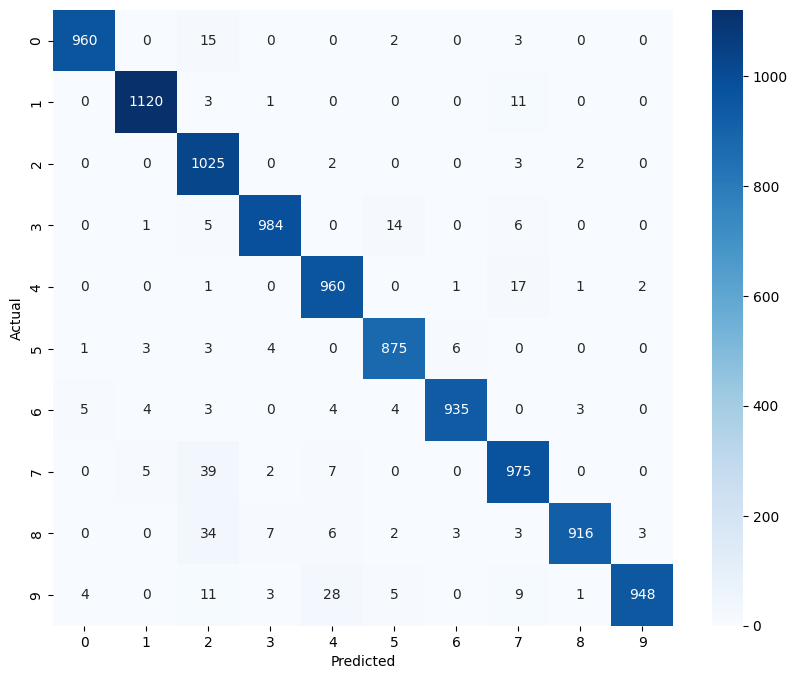

In [ ]:
# 3. Plot Confusion Matrix
cm = confusion_matrix(true_classes_1, predicted_class_1
                      )
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy vs val_Accuracy**

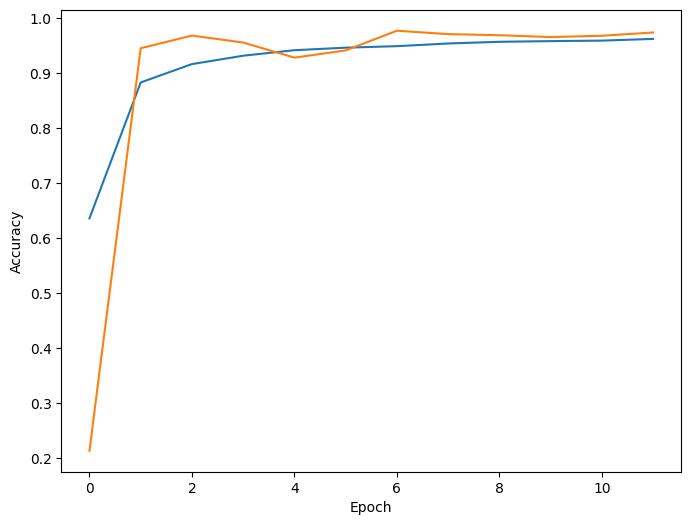

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Loss vs Validation Loss**

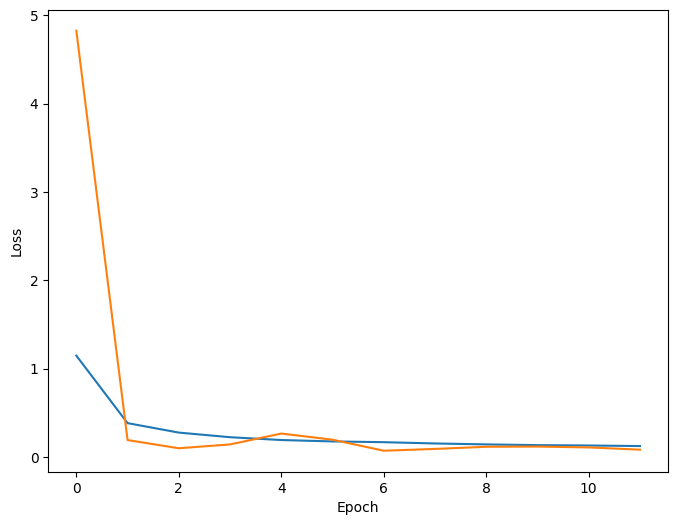

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(history_1.history['loss'], label='Training loss')
plt.plot(history_1.history['val_loss'],label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

kerastuner



In [ ]:
def create_hp_model(hp):
  # 1. Choose Activation Function
  act= hp.Choice('activation', ['relu','leaky_ReLu','tanh'])

  # 2. Choose the number of units in the Dense layers
  dense_units= hp.Int('units',128, 512, step= 128)

  model_2 = models.Sequential()
  model_2.add(layers.Input(shape= (28,28,1)))
  #model_2.add(layers.Rescaling(1./255))
  model_2.add(data_augmentation)

  # --- DYNAMIC CONVOLUTIONAL BLOCKS ---
  # The model chooses how many "blocks" to add (e.g., 1, 2, or 3)
  for i in range(hp.Int('Conv_input_blocks',1,2)):
    filters= hp.Choice(f'filter{i}', values= [32,64])

    model_2.add(layers.Conv2D(filters,(3,3), padding= 'same'))


    if act == 'leaky_ReLu':
        model_2.add(layers.LeakyReLU(negative_slope=0.01))
    else:
        model_2.add(layers.Activation(act))

    model_2.add(layers.BatchNormalization())
    model_2.add(layers.MaxPooling2D(2,2))
    model_2.add(layers.Dropout(hp.Float(f'conv_dropout{i}', 0.1, 0.4, step= 0.1)))

  model_2.add(layers.GlobalAveragePooling2D())
  """
  # dynamic_Bridge(flattenlayer/ GAP)
  bridge= hp.Choice('bridge', values= ['flatten','GAP'])
  if (bridge== 'flatten'):
    model_2.add(layers.Flatten())
  else:
    model_2.add(layers.GlobalAveragePooling2D()) """

  # --- DYNAMIC DENSE LAYERS ---
  for j in range(hp.Int('dense_layer',1,2)):
    dense_filter= hp.Int(f'dense{j}', 128, 256, step= 128)
    model_2.add(layers.Dense(dense_filter))

    if act == 'leaky_ReLu':
        model_2.add(layers.LeakyReLU(negative_slope=0.01))
    else:
        model_2.add(layers.Activation(act))

    model_2.add(layers.BatchNormalization())
    model_2.add(layers.Dropout(hp.Float(f'dropout{j}', 0.25, 0.40, step= 0.10)))

  model_2.add(layers.Dense(10, activation= 'softmax'))

  # --- DYNAMIC OPTIMIZER ---

  optimizers= hp.Choice('optimizer', values= ['adam', 'sgd', 'rmsprop'])
  model_2.compile(
      optimizer= optimizers,
      loss = 'categorical_crossentropy',
      metrics= ['accuracy']

  )

  return model_2



In [ ]:
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 1,
    mode= 'auto',
    restore_best_weights= True
)

checkpoint= callbacks.ModelCheckpoint(
    'best_mnist_model_2.keras',
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode= 'max'
    )

my_callbacks_1 = [early_stopping, checkpoint]

In [ ]:
#This creates a tuner that will try up to 5 different hyperparameter combinations.
#It looks at the validation loss (val_loss) to select the best hyperparameters.
#Results will be stored in my_dir/keras_tuner_best_mnist_model_2.
tuner= kt.Hyperband(
    create_hp_model,
    objective= 'val_loss',
    max_epochs= 5,
    directory= 'my_dir',
    project_name='keras_tuner_best_mnist_model_2'
)

Reloading Tuner from my_dir/keras_tuner_best_mnist_model_2/tuner0.json


Run the search for the best **hyperparameters**

In [ ]:
#This starts training models with different hyperparameters for 10 epochs each.
#20% of your training data is used as validation to compute val_loss.
tuner.search(
    train_images,
    train_labels_categorical,
    validation_split= 0.10,
    batch_size = 128,
    callbacks= my_callbacks_1
)

In [ ]:
# 1. Get the best hyperparameters found during the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# 2. Re-build the model with those specific parameters
final_model_2 = tuner.hypermodel.build(best_hps)

# 3. Print a summary
print(f"""
The hyperparameter search is complete.
- Optimal Activation: {best_hps.get('activation')}
- Optimal Optimizer: {best_hps.get('optimizer')}
""")
final_model_2.summary()


The hyperparameter search is complete.
- Optimal Activation: relu
- Optimal Optimizer: adam



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,346 (384.16 KB)

 Trainable params: 97,130 (379.41 KB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
# Calculate weights to balance the biases
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels), #train_labels are 0-9
    y=train_labels
)
dict_weights = dict(enumerate(weights))

In [ ]:
# Final Long Training
history_2 = final_model_2.fit(
    train_images,
    train_labels_categorical,
    epochs=25,
    class_weight= dict_weights,
    validation_split=0.20,
    batch_size=128,
    callbacks=my_callbacks_1
)

Epoch 1/25
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4125 - loss: 1.8094
Epoch 1: val_accuracy improved from -inf to 0.14508, saving model to best_mnist_model_2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4137 - loss: 1.8054 - val_accuracy: 0.1451 - val_loss: 4.3818
Epoch 2/25
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7836 - loss: 0.6672
Epoch 2: val_accuracy improved from 0.14508 to 0.59958, saving model to best_mnist_model_2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7837 - loss: 0.6669 - val_accuracy: 0.5996 - val_loss: 1.2655
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8507 - loss: 0.4763
Epoch 3: val_accuracy improved from 0.59958 to 0.72733, saving model to best_mnist_model_2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8508 - loss: 0.4763 - val_accuracy: 0.7273 - val_loss: 0.8850
Epoch 4/25
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8763 - loss: 0.3911
Epoch 4: 

In [ ]:
test_loss, test_acc = final_model_2.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9033 - loss: 0.2994
test_loss : 0.26
test_acc : 0.92


In [ ]:
#get prediction
predictions_2 = final_model_2.predict(test_images)
predicted_class_2 = np.argmax(predictions_2, axis=1)
true_classes_2 = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(classification_report(true_classes_2, predicted_class_2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       980
           1       0.93      0.98      0.96      1135
           2       0.92      0.84      0.88      1032
           3       0.93      0.96      0.95      1010
           4       0.89      0.94      0.91       982
           5       0.86      0.90      0.88       892
           6       0.97      0.91      0.94       958
           7       0.95      0.89      0.92      1028
           8       0.91      0.91      0.91       974
           9       0.96      0.85      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



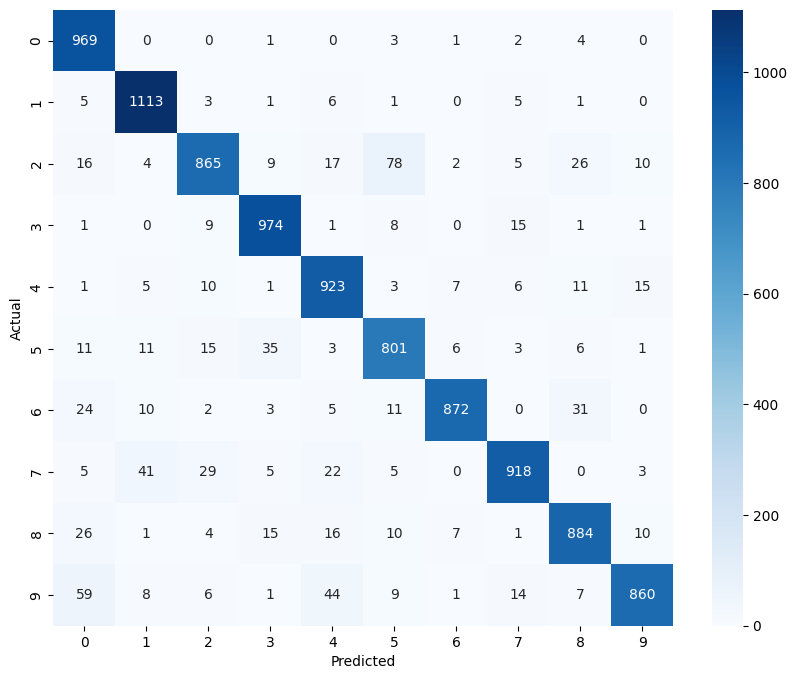

In [ ]:
# 3. Plot Confusion Matrix
cm = confusion_matrix(true_classes_2, predicted_class_2
                      )
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy vs val_Accuracy**

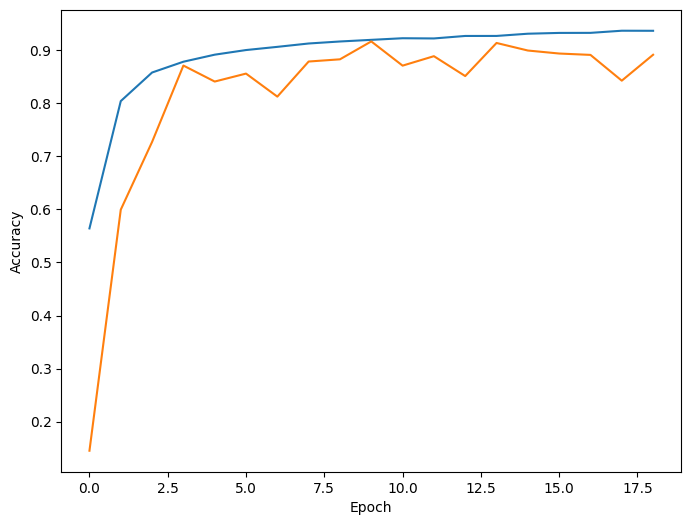

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Loss vs Validation Loss**

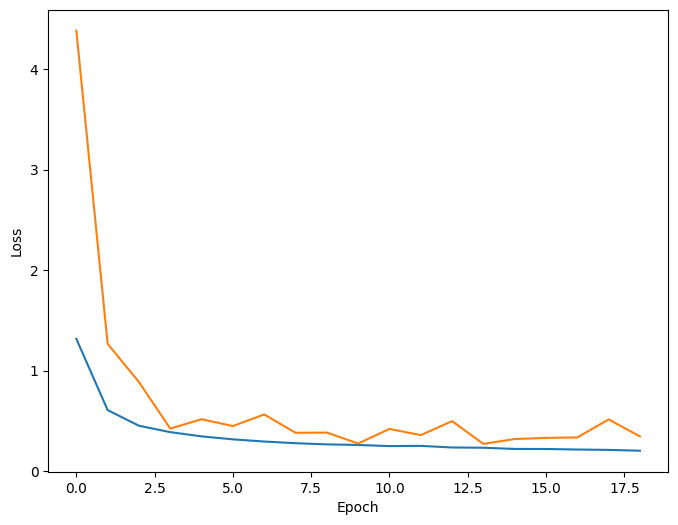

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(history_2.history['loss'], label='Training loss')
plt.plot(history_2.history['val_loss'],label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# **Conclusion:**
**Dynamic Architecture**: The model choose its own depth and breadth.

**Bias Control**: Implemented class_weight to ensure the model stayed fair across all digits.

**Near-Perfect Results**: 92% accuracy with a nearly clean diagonal on the confusion matrix.

# **Prediction**

In [ ]:
from google.colab import files
files.upload()

Saving 8.png to 8 (1).png


{'8 (1).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02G\x00\x00\x02F\x08\x06\x00\x00\x00Q\x1f!R\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x17\xb3IDATx^\xed\xd6[r$\xb7\x92EQ\xcd\x7f\xd2\xdd\xa6.U\x13<d&\xc9$\x10\xe1\x0e\xace\xb6\x7f\xeeC\xaa\n\xa4\xc3\xf1\xcf\xff\x00\x00\xf0\xff\xfe\xc9\xff\x00\x00\xe0d\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x11\x00\xc0\xc0\xe3\x08\x00`\xe0q\x04\x000\xf08\x02\x00\x18x\x1c\x01\x00\x0c<\x8e\x00\x00\x06\x1eG\x00\x00\x03\x8f#\x00\x80\x81\xc7\x1

In [ ]:
def predict_image(image_path):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255.0
  img_array = img_array.reshape((1,28,28,1))

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  print(f"predicted_class: {predicted_class}, confidence: {confidence}")

  prediction_1 = model_1.predict(img_array)
  predicted_class_1 = np.argmax(prediction_1)
  confidence_1 = np.max(prediction_1)
  print(f"predicted_class:{predicted_class_1},confidence: {confidence_1}")

  prediction_2 = final_model_2.predict(img_array)
  predicted_class_2 = np.argmax(prediction_2)
  confidence_2 = np.max(prediction_2)
  print(f"predicted_class:{prediction_2}, confidence: {confidence_2}")
  #return predicted_class, confidence, predicted_class_1, confidence_1, prediction_2, confidence_2

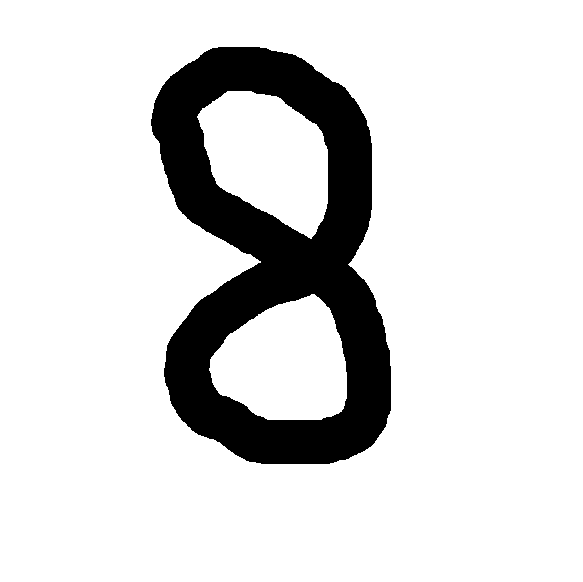

In [ ]:
predict_image("/content/8.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predicted_class: 8, confidence: 0.9998267292976379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted_class:8,confidence: 0.9998181462287903
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted_class:[[3.4302019e-04 1.3772110e-07 1.1130820e-03 1.6838545e-05 1.9686647e-07
  1.4719659e-06 1.5427915e-05 2.2402253e-07 9.9842048e-01 8.9127396e-05]], confidence: 0.9984204769134521


In [ ]:
files.upload()

Saving 6.png to 6.png


{'6.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe5\x00\x00\x023\x08\x06\x00\x00\x00>\xbf\x01\xcd\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x01\x87iTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?>\r\n<x:xmpmeta xmlns:x="adobe:ns:meta/"><rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"><rdf:Description rdf:about="uuid:faf5bdd5-ba3d-11da-ad31-d33d75182f1b" xmlns:tiff="http://ns.adobe.com/tiff/1.0/"><tiff:Orientation>1</tiff:Orientation></rdf:Description></rdf:RDF></x:xmpmeta>\r\n<?xpacket end=\'w\'?>,\x94\x98\x0b\x00\x00\x0e\xa4IDATx^\xed\xdd\xcbV#9\x16@Q\xdc\xff\xff\xcf\xd1\x83N\xaah\x12\x83\xb1\xe3q$\xed\xbdVM\x98$8\xa4{\xacp@\xdd\xb6m\xdb\xde\x00\x80\xcb\xfd\xe7\xf3\x17\x00\x80k\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x00D\x882\x0

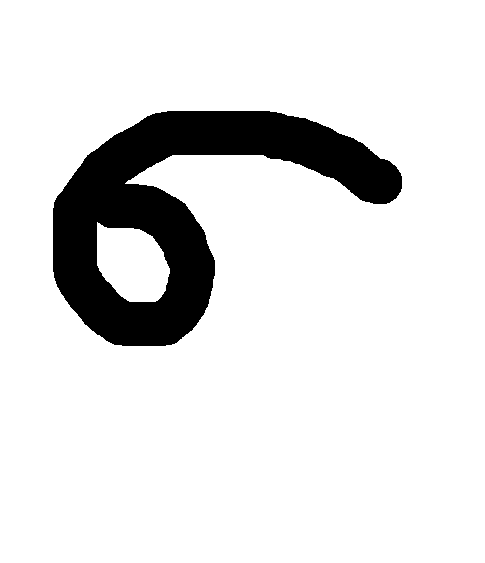

In [ ]:
predict_image("/content/6.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
predicted_class: 6, confidence: 0.9588282108306885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
predicted_class:6,confidence: 0.9954769015312195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
predicted_class:[[1.8915371e-04 3.1810725e-06 8.6657674e-06 2.0614825e-06 2.4021961e-06
  6.2359087e-03 9.8544681e-01 2.2219583e-08 8.1073893e-03 4.3941982e-06]], confidence: 0.9854468107223511
